In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def get_cat_cols(df: pd.DataFrame) -> list:
    """"
    :param df: Dataframe
    :return: list of column names

    to get categorical columns
    """
    return [col for col in df.columns if (df[col].dtype == 'object') or (df[col].dtype == 'categorical')]

def get_num_cols(df):
    """"
    :param df: Dataframe
    :return: list of column names

    to get num columns
    """
    return [col for col in df.columns if df[col].dtype != 'object']

def get_info(dataset: pd.DataFrame):
    """

    :param dataset: pd.DataFrame
    :return: pd.DataFrame

    Makes a new df with missing and unique values.
    """
    new_df = pd.DataFrame()
    new_df['missing_count'] = dataset.isnull().sum()
    new_df['total'] = dataset.shape[0]
    new_df['missing%'] = (dataset.isnull().sum() / dataset.shape[0])*100
    new_df['n_unique'] = dataset.nunique()
    new_df['type'] = dataset.dtypes
    print(f"Size: {dataset.shape}")
    return new_df

path = "/kaggle/input/clustering-categorical-peoples-interests/kaggle_Interests_group.csv"
data = pd.read_csv(path)

print(data.size)
data = data.drop_duplicates()
print(data.size)
info = get_info(data)
info

1388460
1353639
Size: (6181, 219)


,missing_count,total,missing%,n_unique,type
group,0,6181,0.000000,4,object
grand_tot_interests,0,6181,0.000000,85,int64
interest1,5188,6181,83.934638,1,float64
interest2,6180,6181,99.983821,1,float64
interest3,6146,6181,99.433749,1,float64
...,...,...,...,...,...
interest213,6179,6181,99.967643,1,float64
interest214,6109,6181,98.835140,1,float64
interest215,1238,6181,20.029122,2,float64
interest216,2123,6181,34.347193,2,float64


In [2]:
data

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
6336,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6337,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6338,I,38,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN


### Dropping columns with more than 90% missing values

In [3]:
data.fillna(0, inplace=True)

### filling nan values with 0 seems to be the right choice, as the columns represents binary values (1 = has, 0 = does not) and grand total interests represnts the total of interests of a person

In [4]:
data.drop(["group", "grand_tot_interests"], axis="columns").loc[0].values.sum()
data.drop(["group", "grand_tot_interests"], axis="columns").loc[6339].values.sum()

66.0

group :  ['C' 'P' 'R' 'I']


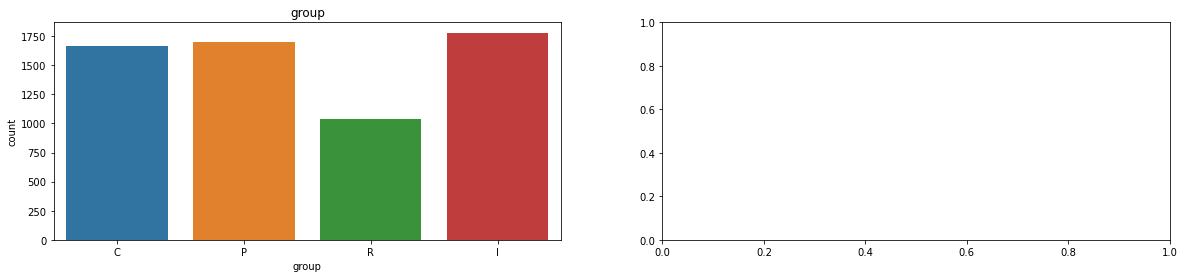

In [5]:
num_cols = get_num_cols(data)
cat_cols = get_cat_cols(data)

for col in cat_cols:
    print(col, ': ', data[col].unique())

_, axes = plt.subplots(1, 2, figsize=(20, 4))

for index, i in enumerate(cat_cols):
    sns.countplot(ax=axes[index], x=data[i])
    axes[index].tick_params(axis="x")
    axes[index].set_title(i)
    
plt.show()

In [6]:
data.describe()

,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
count,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,...,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000,6181.000000
mean,38.211293,0.160654,0.000162,0.005663,0.004045,0.129267,0.549426,0.000162,0.015046,0.054037,...,0.019253,0.017796,0.815402,0.400582,0.142210,0.000324,0.011649,0.799871,0.656690,0.023783
std,14.882768,0.367241,0.012720,0.075042,0.063474,0.336004,0.498241,0.012720,0.121746,0.226823,...,0.138595,0.132222,0.389252,0.490716,0.350219,0.017987,0.107307,0.400534,0.475193,0.152383
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,104.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000


In [7]:
# from sklearn.impute import KNNImputer
# from sklearn.impute import SimpleImputer

# num_cols = get_num_cols(data)
# cat_cols = get_cat_cols(data)

# imputer = SimpleImputer(strategy='mean')
# data[num_cols] = imputer.fit_transform(data[num_cols])

In [8]:
print("Duplicate rows:", data.duplicated().sum())
print("Duplicate columns:", data.T.duplicated().sum())
# data_unique = data.drop_duplicates()

Duplicate rows: 0
Duplicate columns: 0


,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
interest1,1.000000,0.029076,0.025701,0.034595,0.037554,0.152479,0.029076,0.018310,0.053113,-0.005565,...,0.009163,0.017755,0.081847,0.054073,0.100379,0.016626,-0.002328,0.157012,0.098201,-0.004673
interest2,0.029076,1.000000,0.168565,-0.000811,0.032967,0.011504,-0.000162,-0.001572,-0.003031,-0.000162,...,-0.001767,-0.001712,0.006033,0.015540,0.031159,-0.000229,-0.001381,0.006356,0.009191,-0.001985
interest3,0.025701,0.168565,1.000000,0.029162,0.035140,0.024972,-0.000960,0.008384,0.020046,-0.000960,...,0.036191,0.022458,0.024712,0.030669,0.037081,-0.001358,0.031996,0.032325,0.049987,0.002372
interest4,0.034595,-0.000811,0.029162,1.000000,0.021003,0.042285,-0.000811,0.054941,0.108447,-0.000811,...,0.267052,-0.008578,0.030224,0.046679,0.097865,-0.001147,0.016838,0.031844,0.029950,-0.009947
interest5,0.037554,0.032967,0.035140,0.021003,1.000000,0.187520,-0.004894,0.035514,0.073938,-0.004894,...,0.033417,0.130320,0.140413,0.103962,0.150398,0.019852,0.214038,0.158593,0.173607,0.025275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
interest213,0.016626,-0.000229,-0.001358,-0.001147,0.019852,-0.001785,-0.000229,-0.002224,-0.004286,-0.000229,...,-0.002499,-0.002422,0.008533,0.021978,0.044069,1.000000,-0.001953,0.008990,-0.005933,-0.002808
interest214,-0.002328,-0.001381,0.031996,0.016838,0.214038,0.004362,-0.001381,0.011354,-0.005921,-0.001381,...,0.017559,0.110838,0.024371,0.018923,0.024805,-0.001953,1.000000,0.031660,0.037186,-0.007049
interest215,0.157012,0.006356,0.032325,0.031844,0.158593,0.403504,0.006356,0.051806,0.092338,0.006356,...,0.054845,0.006154,0.513384,0.258935,0.190235,0.008990,0.031660,1.000000,0.628548,0.043529
interest216,0.098201,0.009191,0.049987,0.029950,0.173607,0.386064,0.009191,0.064128,0.119599,0.009191,...,0.078263,0.012269,0.450772,0.290085,0.225350,-0.005933,0.037186,0.628548,1.000000,0.063612


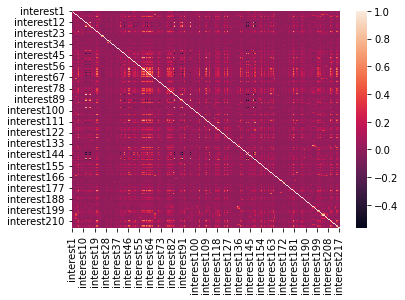

In [9]:
mapper = {col: {d:index for index, d in enumerate(data[col].unique())} for col in cat_cols}
for col in cat_cols:
    data[col] = data[col].map(mapper[col])
data["group"].nunique()

X = data.drop(["group", "grand_tot_interests"], axis="columns")
y = data["group"]

df = pd.DataFrame()
df["grand_tot_interests"] = data["grand_tot_interests"]

corr = pd.DataFrame(X).corr()
sns.heatmap(corr)
corr

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# choosing the right n_components, and scaling technique

for i in [5, 20, 50, 90, 150]:
    X_std = StandardScaler().fit_transform(X)
    X_minmax = MinMaxScaler().fit_transform(X)
    
    pca_std = PCA(n_components=i).fit(X_std)
    pca_minmax = PCA(n_components=i).fit(X_minmax)

    print(f"for n={i}:")
    print("StdScaler variance:", np.sum(pca_std.explained_variance_ratio_[:10]))
    print("MinMax variance:", np.sum(pca_minmax.explained_variance_ratio_[:10]))

for n=5:
StdScaler variance: 0.16764365430200034
MinMax variance: 0.3124609687935108
for n=20:
StdScaler variance: 0.21353857842425727
MinMax variance: 0.40848455902042113
for n=50:
StdScaler variance: 0.21345105046206267
MinMax variance: 0.4084844186331699
for n=90:
StdScaler variance: 0.21355880653757772
MinMax variance: 0.40848469651574043
for n=150:
StdScaler variance: 0.21357954739152304
MinMax variance: 0.40848469687179134


### MinMax is the way to go

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

<AxesSubplot:ylabel='Density'>

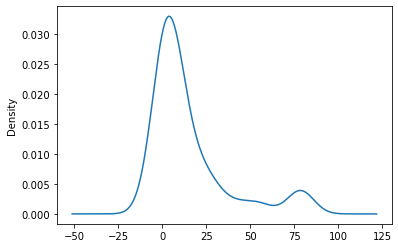

In [12]:
pd.DataFrame(X_scaled).skew().plot(kind="kde")

### Reduce dimensionality

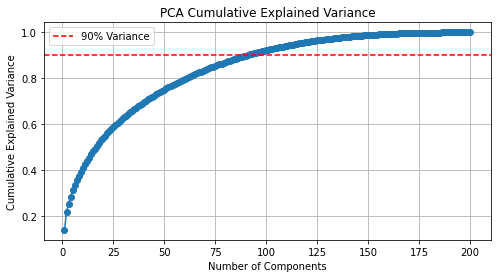

In [13]:
# Cumulative explained variance ratio
def cumulativeExplainedVariance(S, k_range):
  variance_ratio = np.zeros(k_range) 

  for i in range(k_range):
      variance_ratio[i] = np.sum(S[0:i+1])/np.sum(S)
  return variance_ratio

pca = PCA(n_components=200)
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 201), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)

### we will go for n=100

# Clustering DATA 

In [15]:
!pip install kneed -q

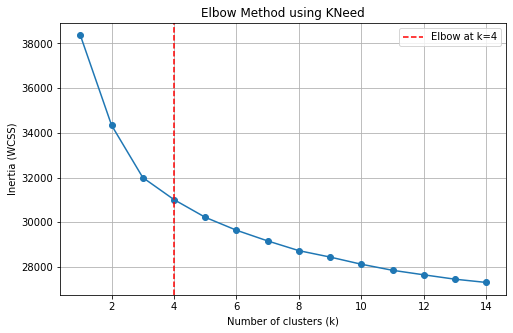

Optimal number of clusters: 4


In [16]:
from kneed import KneeLocator

inertia = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

knee = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Elbow at k={optimal_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method using KNeed')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal number of clusters: {optimal_k}")

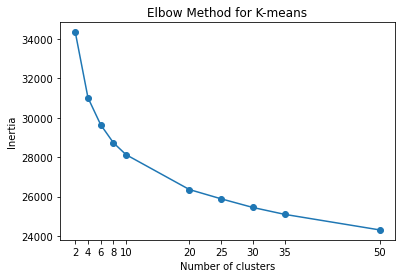

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

inertia = []
k_range = [2, 4, 6, 8, 10, 20, 25, 30, 35, 50]
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xticks(k_range)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-means')
plt.show()

### We will go with 4 as the kneelocator detected it to be the elbow point

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

df['KMeans_Cluster'] = labels_kmeans

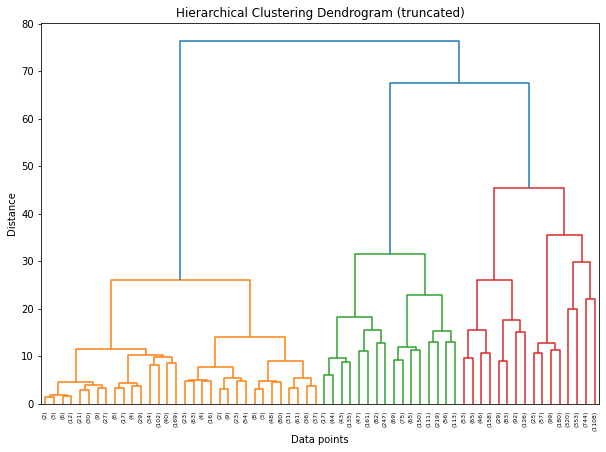

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

labels_hier = fcluster(linked, t=4, criterion='maxclust')
df['Hierarchical_Cluster'] = labels_hier

# plotting by reducing dimensionality

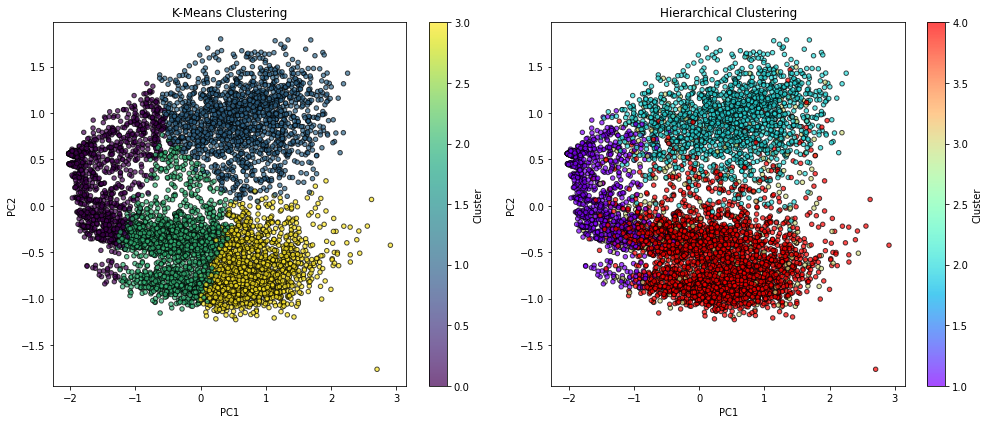

In [20]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_scaled)

plt.figure(figsize=(14, 6))

# KMeans Clustering
plt.subplot(1, 2, 1)
scatter_k = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels_kmeans, cmap='viridis', s=20, edgecolor='k', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter_k, label='Cluster')

# Hierarchical Clustering
plt.subplot(1, 2, 2)
scatter_h = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels_hier, cmap='rainbow', s=20, edgecolor='k', alpha=0.7)
plt.title('Hierarchical Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter_h, label='Cluster')

plt.tight_layout()
plt.show()


Text(0.5, 0, 'PC1')

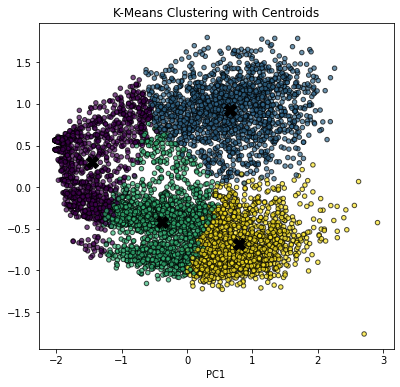

In [21]:
X_vis = pca_vis.fit_transform(X_pca)

# Project KMeans cluster centers to 2D
centers_2d = pca_vis.transform(kmeans.cluster_centers_)

plt.figure(figsize=(14, 6))

# KMeans Clustering
plt.subplot(1, 2, 1)
scatter_k = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels_kmeans, cmap='viridis', s=20, edgecolor='k', alpha=0.7)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='black', s=150, marker='X', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('PC1')

In [22]:
df['Hierarchical_Cluster'] = df['Hierarchical_Cluster'].apply(lambda x: x-1)

In [23]:
df["true"] = y
df

,grand_tot_interests,KMeans_Cluster,Hierarchical_Cluster,true
0,17,0,0,0
1,43,1,1,0
2,27,2,0,0
3,34,2,3,0
4,36,2,2,0
...,...,...,...,...
6335,53,3,3,3
6336,48,3,3,3
6337,48,3,3,3
6338,38,1,1,3


### Two of the clustering algorithm resulted in almost same result, while the ground truth is not. This is a matter of further investigation of how the author of the dataset curated it.

In [24]:
from sklearn.metrics import adjusted_rand_score

# Evaluate clustering performance
print("KMeans ARI:", adjusted_rand_score(df['true'], df['KMeans_Cluster']))
print("Hierarchical ARI:", adjusted_rand_score(df['true'], df['Hierarchical_Cluster']))

print("KMeans vs Hierarchical:", adjusted_rand_score(df['Hierarchical_Cluster'], df['KMeans_Cluster']))

KMeans ARI: 0.010351383621744443
Hierarchical ARI: 0.03455149679090151
KMeans vs Hierarchical: 0.4249376902411746


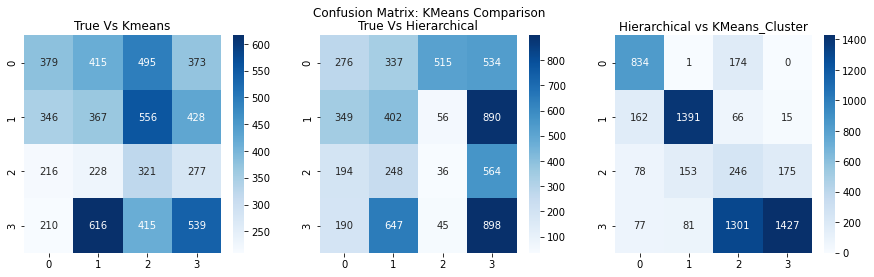

In [25]:
from sklearn.metrics import confusion_matrix

_, axes = plt.subplots(1, 3, figsize=(15, 4))

cm = confusion_matrix(df['true'], df['KMeans_Cluster'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(df['KMeans_Cluster']), yticklabels=np.unique(df['true']), ax=axes[0])
axes[0].set_title("True Vs Kmeans")

cm = confusion_matrix(df['true'], df['Hierarchical_Cluster'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(df['Hierarchical_Cluster']), yticklabels=np.unique(df['true']), ax=axes[1])
axes[1].set_title("True Vs Hierarchical")

cm = confusion_matrix(df['Hierarchical_Cluster'], df['KMeans_Cluster'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(df['Hierarchical_Cluster']), yticklabels=np.unique(df['KMeans_Cluster']), ax=axes[2])
axes[2].set_title("Hierarchical vs KMeans_Cluster")

plt.suptitle("Confusion Matrix: KMeans Comparison")
plt.show()